# Исследование сервиса аренды самокатов GoFast

В моём распоряжении данные о пользователях и поездках сервиса аренды самокатов GoFast - мобильное приложение. Мне предстоит изучить данные и проверить гипотезы, которые могут помочь бизнесу вырасти.

Мне известно, что пользователи могут пользоваться сервисом:
- без подписки, при этом стоимость одной минуты поездки — 8 рублей, стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra, при этом абонентская плата — 199 рублей в месяц, стоимость одной минуты поездки — 6 рублей, стоимость старта — бесплатно.

*Цель исследования*:
- изучить данные о пользователях и поездках;
- проверить гипотезы, которые могут помочь бизнесу вырасти;
- используя распределения, помочь отделу маркетинга GoFast с проведением акции и рассылкой push-уведомлений.

*Ход исследования*:

Необходимые данные для исследования получу из датасетов: `users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`. О состоянии и качестве данных ничего не известно, поэтому я сначала открою файл и изучу общую информацию.

Предобработаю данные:
- Если будут проблемы с наименованием столбцов, то переименую их, чтобы привести к удобным и читаемым названиям.
- Проверю на явные дубликаты и если такие имеются, то удалю.
- Проверю на наличие пропусков и обработаю их.
- Если будет необходимость, то исправлю типы данных
- Обработаю неявные дубликаты.
- Для удобного анализа в дальнейшем - добавлю необходимые столбцы.

Перейду к исследовательскому анализу данных, где опишу и визуализирую общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

Затем объединю данные о пользователях, поездках и подписках в один датафрейм и создам ещё два датафрейма с данными о пользователях без подписки и с подпиской. После этого визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий.

После этого подсчитаю выручку и приступлю к проверкам гипотез:
- тратят ли пользователи с подпиской больше времени на поездки?
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- какой тест мне понадобится для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось?

В завершении исследования я займусь распределениями:
- подберу параметры распределения, описывающего ситуацию с акцией по раздаче промокодов на один бесплатный месяц подписки;
- оценю вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

В конце напишу общий вывод.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users_data = pd.read_csv('./datasets/users_go.csv')
rides_data = pd.read_csv('./datasets/rides_go.csv')
subscriptions_data = pd.read_csv('./datasets/subscriptions_go.csv')

Прочитаю первые 5 строк каждого датафрейма и посмотрю общую информацию о данных.

In [3]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Я смог прочитать датасеты, каких-то проблем с этим не возникло.

По предварительной оценке видно, что пропусков в данных нет, у колонок нормальные названия, только у колонки `date` в датасете `rides_data` тип данных object, а не datetime. Это нужно будет исправить. 

Датасеты `users_data` и `subscriptions_data` довольно небольшие - 1565 и 2 строки соответственно, по сравнению с `rides_data`, где 18068 строк. Это не удивительно, так как в `subscriptions_data` - только информация о типах подписки, а в `users_data` должны быть уникальные пользователи. У одного пользователя может быть несколько поездок, поэтому `rides_data` гораздо больше.

## Предобработка данных

### Обработка дубликатов и пропусков

Проверим `users_data` и `rides_data` на наличие явных дубликатов и убедимся, что нет пропусков. Подобные манипуляции с `subscriptions_data` не нужны, так как там всего 2 строки и там всё в порядке.

In [9]:
print('Дубликаты в users_data:', users_data.duplicated().sum())

print('Дубликаты в rides_data:', rides_data.duplicated().sum())

Дубликаты в users_data: 31
Дубликаты в rides_data: 0


In [10]:
print('Пропуски в users_data:')
users_data.isna().sum()

Пропуски в users_data:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
print('Пропуски в rides_data:')
rides_data.isna().sum()

Пропуски в rides_data:


user_id     0
distance    0
duration    0
date        0
dtype: int64

Видим, что в `users_data` есть явные дубликаты, их нужно удалить. В `rides_data` дубликатов нет. Пропусков нет в обоих датасетах.

In [12]:
users_data = users_data.drop_duplicates().reset_index(drop=True)

Перепроверю, что дубликаты удалены.

In [13]:
print('Дубликаты в users_data:', users_data.duplicated().sum())

Дубликаты в users_data: 0


### Исправление типов данных

Исправлю тип данных в колонке `date` в датасете `rides_data`.

In [14]:
rides_data['date'] = pd.to_datetime(rides_data['date'])

Проверю, что тип данных изменился.

In [15]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Добавление новых столбцов

Добавлю столбец с номером месяца в датасете `rides_data`.

In [16]:
rides_data['month'] = rides_data['date'].dt.month

Проверю, что столбец добавился.

In [17]:
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Вывод по предобработке данных

В данных были выявлены следующие проблемы:
- Явные дубликаты в датасете `users_data`, которые я удалил.
- Исправил тип данных в колонке `date` в датасете `rides_data`.
- Добавил столбец с номером месяца в датасете `rides_data`.

Пропусков в данных не обнаружено, других явных дубликатов тоже нет. Неявные дубликаты вряд ли есть, так как в датасетах нет уникальных обозначений, которые могли бы повторяться.
Всё готово к исследовательскому анализу данных.

## Исследовательский анализ данных

### Частота встречаемости городов

Посмотрим какие города и как часто встречаются в датасете `users_data`.

In [18]:
users_data['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

Посмотрим на столбчатой диаграмме для наглядности.

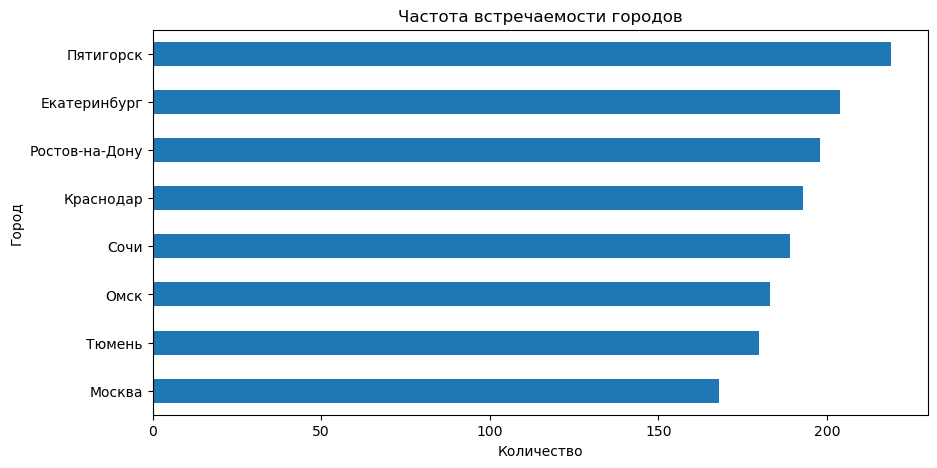

In [19]:
users_data['city'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 5))

plt.title('Частота встречаемости городов')
plt.ylabel('Город')
plt.xlabel('Количество')
plt.show()

Как видно, чаще всего встречается Пятигорск (219), а реже всего - Москва (168). На втором и третьем месте - Екатеринбург (204) и Ростов-на-Дону (198).

### Соотношение пользователей с подпиской и без подписки

Посмотрим на соотношение пользователей с подпиской и без подписки в датасете `users_data`.

In [20]:
users_data['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

Визуализируем это соотношение.

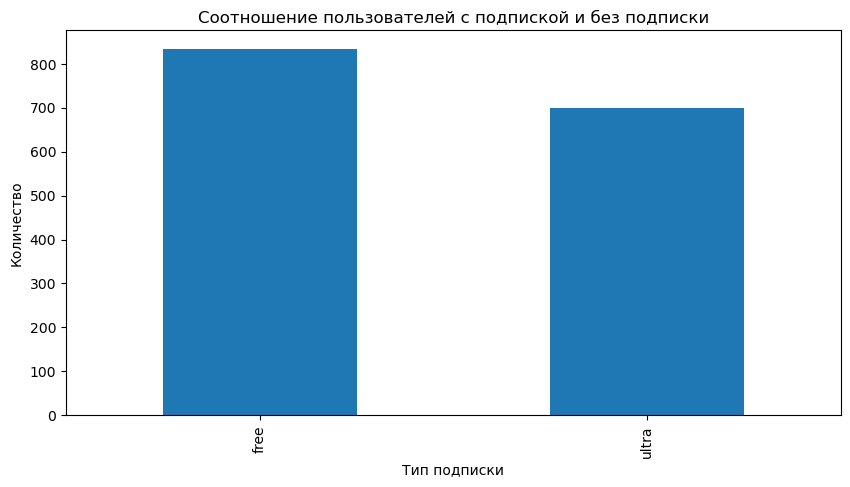

In [21]:
users_data['subscription_type'].value_counts().plot(kind='bar', figsize=(10, 5))

plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('Количество')
plt.xlabel('Тип подписки')
plt.show()

Как видно, пользователей без подписки больше (835), чем с подпиской (699). При этом разрыв не сильно большой. Получается у нас нет явного перекоса в сторону одного из типов подписок.
При этом бесплатных обычно должно быть больше, так как это обычно новые пользователи, которые ещё изучают сервис, прежде чем решаются на подписку или не так часто пользуются сервисом.
Я это проверю на этапе объединения данных.

### Возраст пользователей

Посмотрим на возраст пользователей в датасете `users_data`.

In [22]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Построим гистограмму, чтобы посмотреть на распределение возрастов.

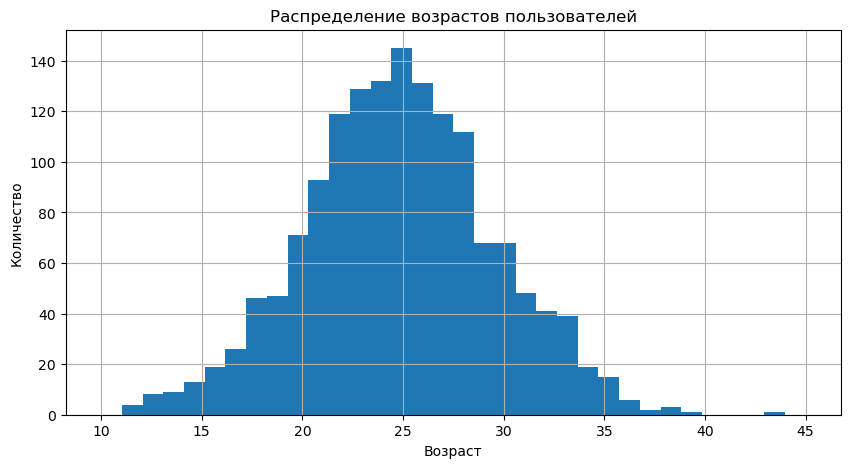

In [23]:
users_data['age'].hist(bins=np.histogram_bin_edges(users_data['age'], bins='auto', range=(10, 45)), figsize=(10, 5))

plt.title('Распределение возрастов пользователей')
plt.ylabel('Количество')
plt.xlabel('Возраст')
plt.show()

Как видно, большинство пользователей в возрасте от 20 до 30 лет. Средний возраст - \~25 лет, медиана - 25 лет. Получается, что в основном сервисом пользуются молодые люди.

### Расстояние, которое пользователь преодолел за одну поездку

Посмотрим на распределение расстояния, которое пользователь преодолел за одну поездку в датасете `rides_data`.

In [24]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Построим гистограмму, чтобы посмотреть на распределение расстояний.

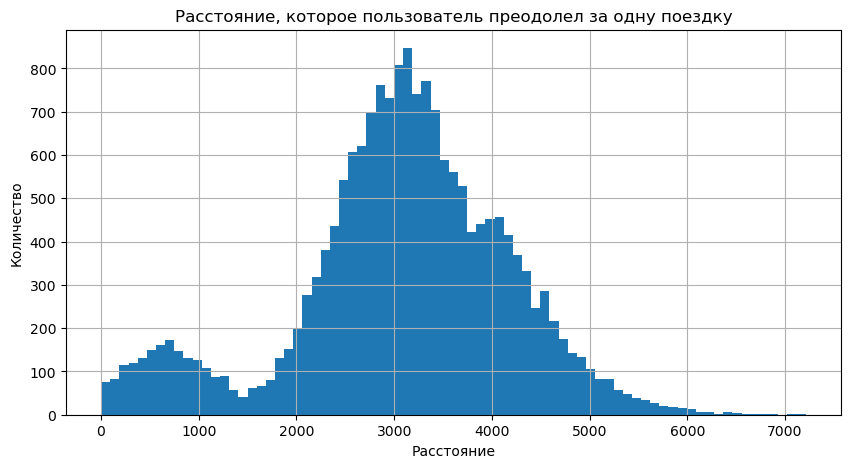

In [25]:
rides_data['distance'].hist(bins=np.histogram_bin_edges(rides_data['distance'], bins='auto'), figsize=(10, 5))

plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество')
plt.xlabel('Расстояние')
plt.show()

Большинство данных находятся в диапазоне от 0 до 6000 метров, ограничу график по этому диапазону.

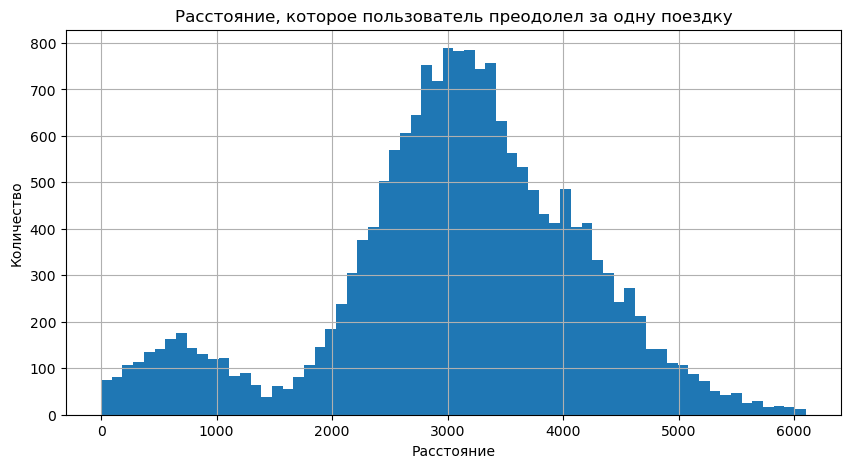

In [26]:
rides_data['distance'].hist(bins=np.histogram_bin_edges(rides_data['distance'], bins='auto', range=(0, 6100)), figsize=(10, 5))

plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество')
plt.xlabel('Расстояние')
plt.show()

Удалю выбросы, где расстояние больше 6000 метров, так как таких поездок немного и распределение без них становится лучше.

In [27]:
rides_data = rides_data.query('distance <= 6100')

Данные для расстояния распределены нормально, с пиком в районе 3000 метров.
Есть ещё один небольшой пик в 500 метров и имеются данные около нуля - я думаю, что это не аномалия.
Скорее всего просто короткие поездки - это когда люди хотели развлечься или просто попробовать сервис.

### Продолжительность поездок

Посмотрим на распределение продолжительности поездок в датасете `rides_data`.

In [28]:
rides_data['duration'].describe()

count    18038.000000
mean        17.804143
std          6.075676
min          0.500000
25%         13.598371
50%         17.671058
75%         21.712469
max         40.823963
Name: duration, dtype: float64

Построим гистограмму, чтобы посмотреть на распределение продолжительности поездок.

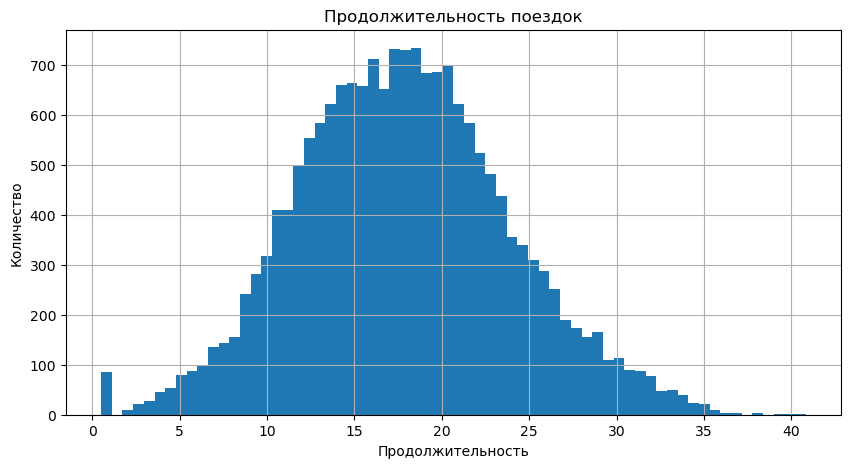

In [29]:
rides_data['duration'].hist(bins=np.histogram_bin_edges(rides_data['duration'], bins='auto'), figsize=(10, 5))

plt.title('Продолжительность поездок')
plt.ylabel('Количество')
plt.xlabel('Продолжительность')
plt.show()

Большинство данных находятся в диапазоне от 1 до 35 минут, ограничу график по этому диапазону.

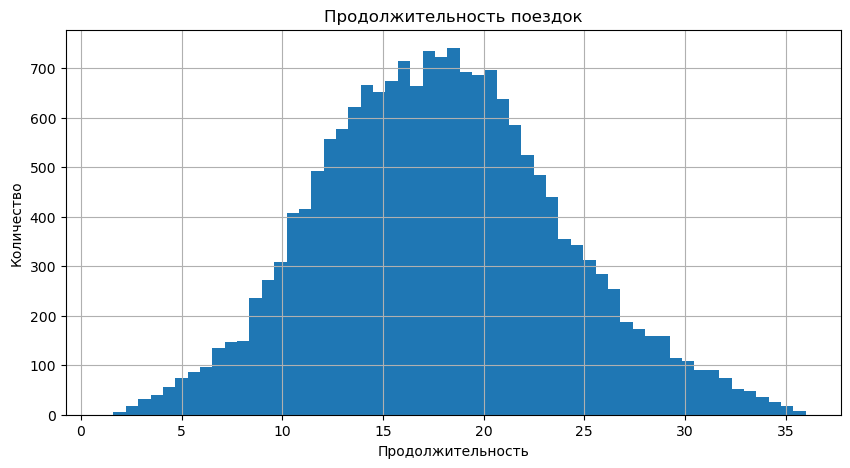

In [30]:
rides_data['duration'].hist(bins=np.histogram_bin_edges(rides_data['duration'], bins='auto', range=(1, 36)), figsize=(10, 5))

plt.title('Продолжительность поездок')
plt.ylabel('Количество')
plt.xlabel('Продолжительность')
plt.show()

Удалю выбросы, где продолжительность меньше 1 минуты и больше 35 минут.

In [31]:
rides_data = rides_data.query('1 <= duration <= 36')

Данные для продолжительности поездок распределены нормально, с пиком в районе 17 минут. 

### Вывод по исследовательскому анализу данных

По итогам исследовательского анализа данных были получены следующие результаты:
- Чаще всего встречается Пятигорск (219), а реже всего - Москва (168).
- Пользователей без подписки больше (835), чем с подпиской (699).
- Большинство пользователей в возрасте от 20 до 30 лет. Средний возраст - \~25 лет.
- Распределение расстояния, которое пользователь преодолел за одну поездку, нормальное, с пиком в районе 3000 метров.
- Распределение продолжительности поездок нормальное, с пиком в районе 17 минут.
- В данных были удалены выбросы, где расстояние больше 6000 метров и продолжительность меньше 1 минуты и больше 35 минут.

## Объединение данных

Объединю данные о пользователях, поездках и подписках в один датафрейм.

In [32]:
data = rides_data.merge(users_data, on='user_id', how='left').merge(subscriptions_data, on='subscription_type', how='left')

Посмотрю на 10 случайных строк объединённого датафрейма.

In [36]:
data.sample(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
8762,872,2103.825700,9.675168,2021-02-09,2,Михаил,28,Омск,free,8,50,0
6288,675,3967.704287,12.522490,2021-06-12,6,Макар,27,Краснодар,ultra,6,0,199
7885,803,1844.884336,8.689769,2021-06-09,6,Тамара,30,Пятигорск,free,8,50,0
255,27,3087.077676,15.124025,2021-07-12,7,Эдуард,20,Краснодар,ultra,6,0,199
6509,701,2465.852577,14.283970,2021-05-31,5,Иван,31,Екатеринбург,free,8,50,0
4572,495,3153.338090,13.460014,2021-02-05,2,Святогор,24,Омск,ultra,6,0,199
3346,361,3159.378686,23.581748,2021-12-29,12,Анастасия,28,Краснодар,ultra,6,0,199
4992,539,3921.846295,19.841810,2021-02-28,2,Всеволод,25,Тюмень,ultra,6,0,199
1673,180,3017.646037,21.459887,2021-03-17,3,Ксения,27,Омск,ultra,6,0,199
11346,1060,2767.041773,16.640900,2021-03-18,3,Софья,20,Краснодар,free,8,50,0


Посмотрю на общую информацию о данных объединённого датафрейма.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17938 entries, 0 to 17937
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17938 non-null  int64         
 1   distance           17938 non-null  float64       
 2   duration           17938 non-null  float64       
 3   date               17938 non-null  datetime64[ns]
 4   month              17938 non-null  int32         
 5   name               17938 non-null  object        
 6   age                17938 non-null  int64         
 7   city               17938 non-null  object        
 8   subscription_type  17938 non-null  object        
 9   minute_price       17938 non-null  int64         
 10  start_ride_price   17938 non-null  int64         
 11  subscription_fee   17938 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Теперь создам ещё два датафрейма из датафрейма `data`:
- с данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [38]:
data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')

Построю графики, чтобы визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [49]:
# Напишу функцию для построения гистограмм, чтобы не дублировать код

def plot_two_hists_by_column(data_first, data_second, column, label):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    data_first[column].hist(bins=np.histogram_bin_edges(data_first[column], bins='auto'), ax=ax[0])
    ax[0].set_title(f'{label} для пользователей без подписки')
    ax[0].set_ylabel('Количество')
    ax[0].set_xlabel(label)

    data_second[column].hist(bins=np.histogram_bin_edges(data_second[column], bins='auto'), ax=ax[1])
    ax[1].set_title(f'{label} для пользователей с подпиской')
    ax[1].set_ylabel('Количество')
    ax[1].set_xlabel(label)

    plt.show()

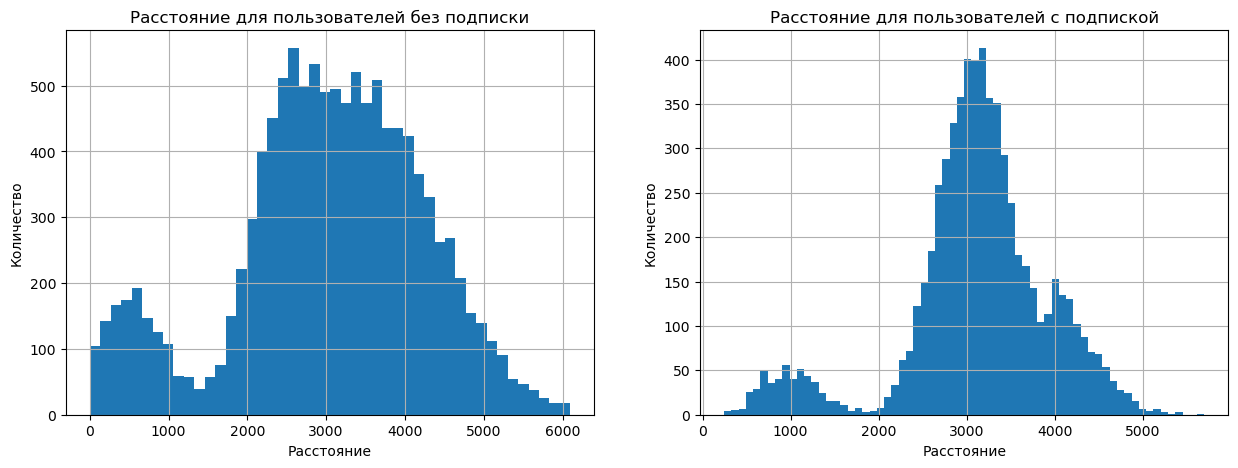

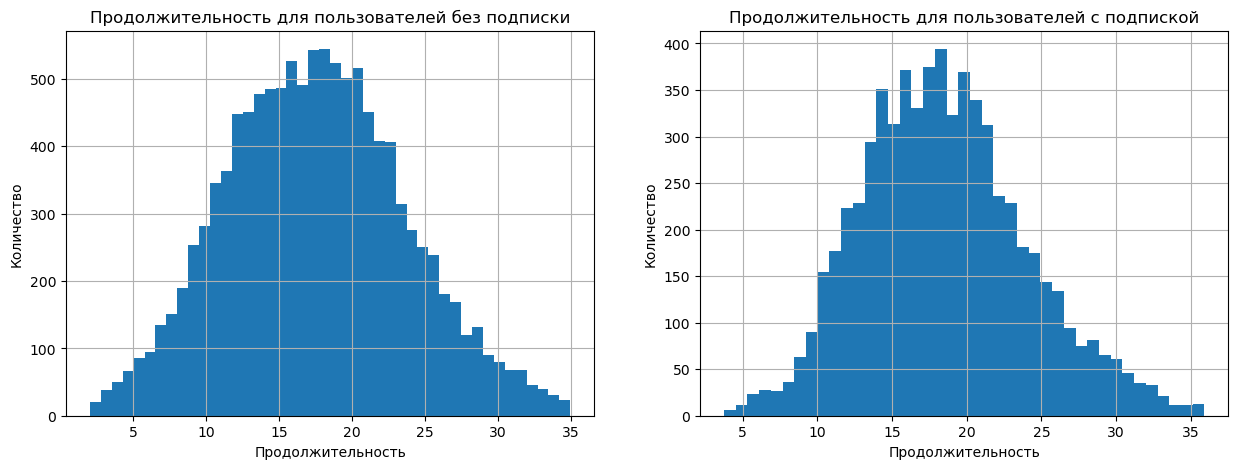

In [50]:
plot_two_hists_by_column(data_free, data_ultra, 'distance', 'Расстояние')

plot_two_hists_by_column(data_free, data_ultra, 'duration', 'Продолжительность')

### Вывод по объединению данных

Данные были успешно объединены. Были созданы два датафрейма:
- с данными о пользователях без подписки;
- с данными о пользователях с подпиской.

По графикам видно, что максимальное расстояние поездки для пользователей без подписки больше примерно на \~1 км. 

## Подсчёт выручки

## Проверка гипотез

## Распределения

## Вывод

Описание проекта и его задач

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.
Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv
user_id: уникальный идентификатор пользователя
name: имя пользователя
age: возраст
city: город
subscription_type: тип подписки (free, ultra)

Поездки — rides_go.csv
user_id: уникальный идентификатор пользователя
distance: расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration: продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date: дата совершения поездки

Подписки — subscriptions_go.csv
subscription_type: тип подписки
minute_price: стоимость одной минуты поездки по данной подписке
start_ride_price: стоимость начала поездки
subscription_fee: стоимость ежемесячного платежа

Шаг 1. Загрузка данных
1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv
1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

Шаг 2. Предобработка данных
2.1 Приведите столбец date к типу даты pandas.
2.2 Создайте новый столбец с номером месяца на основе столбца date.
2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

Шаг 3. Исследовательский анализ данных
Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.

Шаг 4. Объединение данных
4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Шаг 5. Подсчёт выручки
5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

Продолжительность каждой поездки должна быть округлена с помощью метода «потолок» библиотеки numpy — np.ceil():

Помесячная выручка считается по формуле: стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки.

Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Шаг 7. Распределения
7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf(), сформулировать вывод и ответ.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.